In [1]:
 import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [7]:
dog_breeds = [
    {"Breed": "Labrador Retriever", "Price (USD)": 1428, "Population (USA)": 483696, "Weight (kg)": 12, "Height (cm)": 76, "Life Expectancy (years)": 11},
    {"Breed": "German Shepherd", "Price (USD)": 1492, "Population (USA)": 313994, "Weight (kg)": 31, "Height (cm)": 67, "Life Expectancy (years)": 8},
    {"Breed": "Golden Retriever", "Price (USD)": 2505, "Population (USA)": 274184, "Weight (kg)": 49, "Height (cm)": 53, "Life Expectancy (years)": 8},
    {"Breed": "French Bulldog", "Price (USD)": 1584, "Population (USA)": 798137, "Weight (kg)": 19, "Height (cm)": 78, "Life Expectancy (years)": 11},
    {"Breed": "Bulldog", "Price (USD)": 2956, "Population (USA)": 502887, "Weight (kg)": 9, "Height (cm)": 36, "Life Expectancy (years)": 8},
    {"Breed": "Poodle", "Price (USD)": 1938, "Population (USA)": 436419, "Weight (kg)": 40, "Height (cm)": 65, "Life Expectancy (years)": 10},
    {"Breed": "Beagle", "Price (USD)": 876, "Population (USA)": 91494, "Weight (kg)": 11, "Height (cm)": 54, "Life Expectancy (years)": 12},
    {"Breed": "Rottweiler", "Price (USD)": 2792, "Population (USA)": 488052, "Weight (kg)": 38, "Height (cm)": 44, "Life Expectancy (years)": 10},
    {"Breed": "German Shorthaired Pointer", "Price (USD)": 1905, "Population (USA)": 355749, "Weight (kg)": 36, "Height (cm)": 46, "Life Expectancy (years)": 16},
    {"Breed": "Yorkshire Terrier", "Price (USD)": 2371, "Population (USA)": 372840, "Weight (kg)": 26, "Height (cm)": 42, "Life Expectancy (years)": 8},
    {"Breed": "Boxer", "Price (USD)": 1396, "Population (USA)": 368820, "Weight (kg)": 48, "Height (cm)": 68, "Life Expectancy (years)": 12},
    {"Breed": "Dachshund", "Price (USD)": 1579, "Population (USA)": 184819, "Weight (kg)": 26, "Height (cm)": 57, "Life Expectancy (years)": 14},
    {"Breed": "Pembroke Welsh Corgi", "Price (USD)": 1888, "Population (USA)": 619134, "Weight (kg)": 49, "Height (cm)": 31, "Life Expectancy (years)": 12},
    {"Breed": "Siberian Husky", "Price (USD)": 1034, "Population (USA)": 859376, "Weight (kg)": 42, "Height (cm)": 32, "Life Expectancy (years)": 11},
    {"Breed": "Australian Shepherd", "Price (USD)": 1341, "Population (USA)": 156781, "Weight (kg)": 12, "Height (cm)": 71, "Life Expectancy (years)": 13},
    {"Breed": "Great Dane", "Price (USD)": 2263, "Population (USA)": 136741, "Weight (kg)": 53, "Height (cm)": 40, "Life Expectancy (years)": 14},
    {"Breed": "Doberman Pinscher", "Price (USD)": 1390, "Population (USA)": 830707, "Weight (kg)": 34, "Height (cm)": 79, "Life Expectancy (years)": 15},
    {"Breed": "Cavalier King Charles Spaniel", "Price (USD)": 2749, "Population (USA)": 521958, "Weight (kg)": 41, "Height (cm)": 34, "Life Expectancy (years)": 12},
    {"Breed": "Miniature Schnauzer", "Price (USD)": 2955, "Population (USA)": 591195, "Weight (kg)": 59, "Height (cm)": 53, "Life Expectancy (years)": 12},
    {"Breed": "Shih Tzu", "Price (USD)": 1175, "Population (USA)": 268157, "Weight (kg)": 19, "Height (cm)": 78, "Life Expectancy (years)": 12},
    {"Breed": "Boston Terrier", "Price (USD)": 2256, "Population (USA)": 788159, "Weight (kg)": 17, "Height (cm)": 76, "Life Expectancy (years)": 11},
    {"Breed": "Bernese Mountain Dog", "Price (USD)": 1356, "Population (USA)": 524118, "Weight (kg)": 26, "Height (cm)": 66, "Life Expectancy (years)": 12},
    {"Breed": "Pomeranian", "Price (USD)": 1242, "Population (USA)": 743724, "Weight (kg)": 8, "Height (cm)": 38, "Life Expectancy (years)": 13},
    {"Breed": "Havanese", "Price (USD)": 1937, "Population (USA)": 606690, "Weight (kg)": 12, "Height (cm)": 79, "Life Expectancy (years)": 14},
    {"Breed": "Shetland Sheepdog", "Price (USD)": 1652, "Population (USA)": 601527, "Weight (kg)": 26, "Height (cm)": 42, "Life Expectancy (years)": 11},
    {"Breed": "Brittany Spaniel", "Price (USD)": 2044, "Population (USA)": 306499, "Weight (kg)": 55, "Height (cm)": 30, "Life Expectancy (years)": 9},
    {"Breed": "English Springer Spaniel", "Price (USD)": 1307, "Population (USA)": 608992, "Weight (kg)": 35, "Height (cm)": 22, "Life Expectancy (years)": 15},
    {"Breed": "Cocker Spaniel", "Price (USD)": 2116, "Population (USA)": 314002, "Weight (kg)": 13, "Height (cm)": 33, "Life Expectancy (years)": 13},
    {"Breed": "Vizsla", "Price (USD)": 1673, "Population (USA)": 701788, "Weight (kg)": 14, "Height (cm)": 50, "Life Expectancy (years)": 13},
    {"Breed": "Mastiff", "Price (USD)": 1649, "Population (USA)": 257360, "Weight (kg)": 20, "Height (cm)": 79, "Life Expectancy (years)": 15},
    {"Breed": "Chihuahua", "Price (USD)": 2324, "Population (USA)": 250273, "Weight (kg)": 6, "Height (cm)": 29, "Life Expectancy (years)": 9},
    {"Breed": "Pug", "Price (USD)": 1380, "Population (USA)": 341234, "Weight (kg)": 8, "Height (cm)": 30, "Life Expectancy (years)": 13},
    {"Breed": "Maltese", "Price (USD)": 1400, "Population (USA)": 213456, "Weight (kg)": 4, "Height (cm)": 25, "Life Expectancy (years)": 14},
    {"Breed": "Basset Hound", "Price (USD)": 900, "Population (USA)": 98765, "Weight (kg)": 27, "Height (cm)": 33, "Life Expectancy (years)": 12},
    {"Breed": "Collie", "Price (USD)": 1550, "Population (USA)": 154321, "Weight (kg)": 30, "Height (cm)": 56, "Life Expectancy (years)": 14},
    {"Breed": "Weimaraner", "Price (USD)": 2100, "Population (USA)": 98765, "Weight (kg)": 40, "Height (cm)": 65, "Life Expectancy (years)": 11},
    {"Breed": "Rhodesian Ridgeback", "Price (USD)": 2300, "Population (USA)": 45678, "Weight (kg)": 38, "Height (cm)": 61, "Life Expectancy (years)": 13},
    {"Breed": "Newfoundland", "Price (USD)": 2500, "Population (USA)": 34567, "Weight (kg)": 60, "Height (cm)": 71, "Life Expectancy (years)": 10},
    {"Breed": "Border Collie", "Price (USD)": 1700, "Population (USA)": 76890, "Weight (kg)": 20, "Height (cm)": 50, "Life Expectancy (years)": 13},
    {"Breed": "West Highland White Terrier", "Price (USD)": 1800, "Population (USA)": 98760, "Weight (kg)": 10, "Height (cm)": 28, "Life Expectancy (years)": 15},
    {"Breed": "Bichon Frise", "Price (USD)": 1900, "Population (USA)": 112345, "Weight (kg)": 7, "Height (cm)": 25, "Life Expectancy (years)": 14},
    {"Breed": "Akita", "Price (USD)": 2700, "Population (USA)": 78901, "Weight (kg)": 45, "Height (cm)": 66, "Life Expectancy (years)": 11},
    {"Breed": "St. Bernard", "Price (USD)": 2200, "Population (USA)": 65432, "Weight (kg)": 70, "Height (cm)": 80, "Life Expectancy (years)": 8},
    {"Breed": "Bloodhound", "Price (USD)": 1400, "Population (USA)": 87654, "Weight (kg)": 50, "Height (cm)": 68, "Life Expectancy (years)": 10},
    {"Breed": "Australian Cattle Dog", "Price (USD)": 1500, "Population (USA)": 67543, "Weight (kg)": 25, "Height (cm)": 46, "Life Expectancy (years)": 12},
    {"Breed": "Alaskan Malamute", "Price (USD)": 2600, "Population (USA)": 54321, "Weight (kg)": 55, "Height (cm)": 69, "Life Expectancy (years)": 12},
    {"Breed": "Bullmastiff", "Price (USD)": 3000, "Population (USA)": 43210, "Weight (kg)": 65, "Height (cm)": 68, "Life Expectancy (years)": 10},
    {"Breed": "Chinese Shar-Pei", "Price (USD)": 2400, "Population (USA)": 32109, "Weight (kg)": 25, "Height (cm)": 49, "Life Expectancy (years)": 11},
    {"Breed": "Cairn Terrier", "Price (USD)": 1100, "Population (USA)": 21098, "Weight (kg)": 15, "Height (cm)": 32, "Life Expectancy (years)": 14},
    {"Breed": "Dalmatian", "Price (USD)": 1800, "Population (USA)": 10987, "Weight (kg)": 27, "Height (cm)": 61, "Life Expectancy (years)": 13},
    {"Breed": "Italian Greyhound", "Price (USD)": 1400, "Population (USA)": 8765, "Weight (kg)": 7, "Height (cm)": 40, "Life Expectancy (years)": 15},
    {"Breed": "Whippet", "Price (USD)": 1200, "Population (USA)": 6543, "Weight (kg)": 10, "Height (cm)": 44, "Life Expectancy (years)": 13},
    {"Breed": "Papillon", "Price (USD)": 1600, "Population (USA)": 4321, "Weight (kg)": 5, "Height (cm)": 28, "Life Expectancy (years)": 15},
    {"Breed": "Chow Chow", "Price (USD)": 2900, "Population (USA)": 3210, "Weight (kg)": 50, "Height (cm)": 56, "Life Expectancy (years)": 12},
    {"Breed": "Norfolk Terrier", "Price (USD)": 1700, "Population (USA)": 2100, "Weight (kg)": 8, "Height (cm)": 25, "Life Expectancy (years)": 14},
    {"Breed": "Soft Coated Wheaten Terrier", "Price (USD)": 1500, "Population (USA)": 1200, "Weight (kg)": 20, "Height (cm)": 45, "Life Expectancy (years)": 14},
    {"Breed": "Irish Setter", "Price (USD)": 2500, "Population (USA)": 1100, "Weight (kg)": 29, "Height (cm)": 64, "Life Expectancy (years)": 13},
    {"Breed": "Lhasa Apso", "Price (USD)": 1800, "Population (USA)": 1500, "Weight (kg)": 7, "Height (cm)": 28, "Life Expectancy (years)": 15},
    {"Breed": "Jack Russell Terrier", "Price (USD)": 1200, "Population (USA)": 1300, "Weight (kg)": 8, "Height (cm)": 35, "Life Expectancy (years)": 16},
    {"Breed": "Norwegian Elkhound", "Price (USD)": 1600, "Population (USA)": 1700, "Weight (kg)": 22, "Height (cm)": 50, "Life Expectancy (years)": 13},
    {"Breed": "Great Pyrenees", "Price (USD)": 2200, "Population (USA)": 1900, "Weight (kg)": 54, "Height (cm)": 70, "Life Expectancy (years)": 10},
    {"Breed": "Keeshond", "Price (USD)": 2100, "Population (USA)": 1400, "Weight (kg)": 16, "Height (cm)": 46, "Life Expectancy (years)": 14},
    {"Breed": "English Bulldog", "Price (USD)": 2500, "Population (USA)": 1500, "Weight (kg)": 23, "Height (cm)": 40, "Life Expectancy (years)": 8},
    {"Breed": "English Mastiff", "Price (USD)": 3200, "Population (USA)": 1300, "Weight (kg)": 68, "Height (cm)": 77, "Life Expectancy (years)": 8},
    {"Breed": "Samoyed", "Price (USD)": 3500, "Population (USA)": 1200, "Weight (kg)": 28, "Height (cm)": 54, "Life Expectancy (years)": 12},
    {"Breed": "Tibetan Terrier", "Price (USD)": 2600, "Population (USA)": 1100, "Weight (kg)": 17, "Height (cm)": 40, "Life Expectancy (years)": 14},
    {"Breed": "Toy Fox Terrier", "Price (USD)": 1300, "Population (USA)": 1000, "Weight (kg)": 3, "Height (cm)": 25, "Life Expectancy (years)": 15},
    {"Breed": "Silky Terrier", "Price (USD)": 1600, "Population (USA)": 900, "Weight (kg)": 5, "Height (cm)": 23, "Life Expectancy (years)": 15},
    {"Breed": "Staffordshire Bull Terrier", "Price (USD)": 2200, "Population (USA)": 800, "Weight (kg)": 25, "Height (cm)": 40, "Life Expectancy (years)": 12},
    {"Breed": "Scottish Terrier", "Price (USD)": 1800, "Population (USA)": 700, "Weight (kg)": 9, "Height (cm)": 28, "Life Expectancy (years)": 13},
    {"Breed": "Westie (West Highland White Terrier)", "Price (USD)": 1900, "Population (USA)": 600, "Weight (kg)": 10, "Height (cm)": 28, "Life Expectancy (years)": 15},
    {"Breed": "Cairn Terrier", "Price (USD)": 1700, "Population (USA)": 500, "Weight (kg)": 8, "Height (cm)": 28, "Life Expectancy (years)": 13},
    {"Breed": "Irish Wolfhound", "Price (USD)": 2800, "Population (USA)": 400, "Weight (kg)": 54, "Height (cm)": 81, "Life Expectancy (years)": 7},
    {"Breed": "Japanese Chin", "Price (USD)": 2200, "Population (USA)": 300, "Weight (kg)": 3, "Height (cm)": 28, "Life Expectancy (years)": 13},
    {"Breed": "Kerry Blue Terrier", "Price (USD)": 2100, "Population (USA)": 200, "Weight (kg)": 16, "Height (cm)": 43, "Life Expectancy (years)": 13},
    {"Breed": "Norwich Terrier", "Price (USD)": 1600, "Population (USA)": 100, "Weight (kg)": 5, "Height (cm)": 25, "Life Expectancy (years)": 14},
    {"Breed": "Afghan Hound", "Price (USD)": 2500, "Population (USA)": 150, "Weight (kg)": 27, "Height (cm)": 67, "Life Expectancy (years)": 12},
    {"Breed": "American Eskimo Dog", "Price (USD)": 1800, "Population (USA)": 220, "Weight (kg)": 12, "Height (cm)": 42, "Life Expectancy (years)": 15},
    {"Breed": "Basenji", "Price (USD)": 2000, "Population (USA)": 190, "Weight (kg)": 11, "Height (cm)": 43, "Life Expectancy (years)": 13},
    {"Breed": "Belgian Malinois", "Price (USD)": 1700, "Population (USA)": 300, "Weight (kg)": 29, "Height (cm)": 61, "Life Expectancy (years)": 14},
    {"Breed": "Bichon Frise", "Price (USD)": 1900, "Population (USA)": 112345, "Weight (kg)": 7, "Height (cm)": 25, "Life Expectancy (years)": 14},
    {"Breed": "Black Russian Terrier", "Price (USD)": 2300, "Population (USA)": 110, "Weight (kg)": 48, "Height (cm)": 70, "Life Expectancy (years)": 10},
    {"Breed": "Border Terrier", "Price (USD)": 1200, "Population (USA)": 250, "Weight (kg)": 6, "Height (cm)": 28, "Life Expectancy (years)": 14},
    {"Breed": "Canaan Dog", "Price (USD)": 2100, "Population (USA)": 130, "Weight (kg)": 20, "Height (cm)": 54, "Life Expectancy (years)": 13},
    {"Breed": "Cardigan Welsh Corgi", "Price (USD)": 1800, "Population (USA)": 160, "Weight (kg)": 14, "Height (cm)": 30, "Life Expectancy (years)": 12},
    {"Breed": "Chesapeake Bay Retriever", "Price (USD)": 2400, "Population (USA)": 280, "Weight (kg)": 30, "Height (cm)": 58, "Life Expectancy (years)": 12},
    {"Breed": "Chinese Crested", "Price (USD)": 2200, "Population (USA)": 80, "Weight (kg)": 5, "Height (cm)": 28, "Life Expectancy (years)": 13},
    {"Breed": "Clumber Spaniel", "Price (USD)": 2600, "Population (USA)": 90, "Weight (kg)": 34, "Height (cm)": 55, "Life Expectancy (years)": 12},
    {"Breed": "Dandie Dinmont Terrier", "Price (USD)": 2300, "Population (USA)": 60, "Weight (kg)": 8, "Height (cm)": 21, "Life Expectancy (years)": 13},
    {"Breed": "Finnish Spitz", "Price (USD)": 2000, "Population (USA)": 70, "Weight (kg)": 20, "Height (cm)": 44, "Life Expectancy (years)": 13},
    {"Breed": "Glen of Imaal Terrier", "Price (USD)": 1700, "Population (USA)": 50, "Weight (kg)": 14, "Height (cm)": 31, "Life Expectancy (years)": 12},
    {"Breed": "Irish Terrier", "Price (USD)": 2100, "Population (USA)": 75, "Weight (kg)": 13, "Height (cm)": 46, "Life Expectancy (years)": 14},
    {"Breed": "Klee Kai", "Price (USD)": 2200, "Population (USA)": 40, "Weight (kg)": 10, "Height (cm)": 33, "Life Expectancy (years)": 14},
    {"Breed": "Lakeland Terrier", "Price (USD)": 1900, "Population (USA)": 90, "Weight (kg)": 7, "Height (cm)": 35, "Life Expectancy (years)": 13},
    {"Breed": "Norwegian Lundehund", "Price (USD)": 2500, "Population (USA)": 30, "Weight (kg)": 6, "Height (cm)": 33, "Life Expectancy (years)": 13},
    {"Breed": "Otterhound", "Price (USD)": 2400, "Population (USA)": 20, "Weight (kg)": 50, "Height (cm)": 70, "Life Expectancy (years)": 10},
    {"Breed": "Pharaoh Hound", "Price (USD)": 2100, "Population (USA)": 100, "Weight (kg)": 20, "Height (cm)": 63, "Life Expectancy (years)": 13},
    {"Breed": "Portuguese Water Dog", "Price (USD)": 2300, "Population (USA)": 150, "Weight (kg)": 27, "Height (cm)": 55, "Life Expectancy (years)": 12},
    {"Breed": "Saluki", "Price (USD)": 2000, "Population (USA)": 80, "Weight (kg)": 23, "Height (cm)": 58, "Life Expectancy (years)": 12},
    {"Breed": "Sealyham Terrier", "Price (USD)": 1800, "Population (USA)": 45, "Weight (kg)": 10, "Height (cm)": 25, "Life Expectancy (years)": 14},
]

df = pd.DataFrame(dog_breeds)
df.to_csv("dog_breeds.csv", index=False)
print(df.head())

                Breed  Price (USD)  Population (USA)  Weight (kg)  \
0  Labrador Retriever         1428            483696           12   
1     German Shepherd         1492            313994           31   
2    Golden Retriever         2505            274184           49   
3      French Bulldog         1584            798137           19   
4             Bulldog         2956            502887            9   

   Height (cm)  Life Expectancy (years)  
0           76                       11  
1           67                        8  
2           53                        8  
3           78                       11  
4           36                        8  


In [12]:
print("Null values per column:\n", df.isnull().sum())
df_cleaned = df.dropna()
print("Cleaned Data:", len(df_cleaned))

Null values per column:
 Breed                      0
Price (USD)                0
Population (USA)           0
Weight (kg)                0
Height (cm)                0
Life Expectancy (years)    0
dtype: int64
Cleaned Data: 100


In [16]:
print(f"\nDataset contains {len(df_cleaned)} data points after cleaning.")
assert len(df_cleaned) >= 100, "Dataset does not contain at least 100 data points."


Dataset contains 100 data points after cleaning.


In [18]:
prices = df_cleaned["Price (USD)"].to_numpy()
weights = df_cleaned["Weight (kg)"].to_numpy()
heights = df_cleaned["Height (cm)"].to_numpy()
populations = df_cleaned["Population (USA)"].to_numpy()
life_exp = df_cleaned["Life Expectancy (years)"].to_numpy()

In [21]:
mean_price = np.mean(prices)
median_weight = np.median(weights)
std_height = np.std(heights)
price_weight_corr = np.corrcoef(prices, weights)[0, 1]
max_population = np.max(populations)

print(f"\nNumPy Operations:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Weight: {median_weight:.2f} kg")
print(f"Std Dev Height: {std_height:.2f} cm")
print(f"Correlation Price & Weight: {price_weight_corr:.2f}")
print(f"Max Population: {max_population}")


NumPy Operations:
Mean Price: 1959.03
Median Weight: 20.00 kg
Std Dev Height: 17.59 cm
Correlation Price & Weight: 0.44
Max Population: 859376


In [25]:
correlation_matrix = df_cleaned[['Price (USD)', 'Weight (kg)','Height (cm)','Population (USA)']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                   Price (USD)  Weight (kg)  Height (cm)  Population (USA)
Price (USD)          1.000000     0.439301     0.206658         -0.174072
Weight (kg)          0.439301     1.000000     0.566613          0.131395
Height (cm)          0.206658     0.566613     1.000000          0.162540
Population (USA)    -0.174072     0.131395     0.162540          1.000000


In [22]:
spearman_corr, spearman_p = stats.spearmanr(heights, life_exp)
print(f"\nSciPy Operation:")
print(f"Spearman correlation between Height and Life Expectancy: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")


SciPy Operation:
Spearman correlation between Height and Life Expectancy: -0.45, p-value: 0.0000


In [27]:
X = df_cleaned[["Weight (kg)", "Height (cm)"]]
X = sm.add_constant(X)
y = df_cleaned["Life Expectancy (years)"]
model = sm.OLS(y, X).fit()
print(f"\nStatsmodels Linear Regression Results:")
print(model.summary())


Statsmodels Linear Regression Results:
                               OLS Regression Results                              
Dep. Variable:     Life Expectancy (years)   R-squared:                       0.333
Model:                                 OLS   Adj. R-squared:                  0.319
Method:                      Least Squares   F-statistic:                     24.16
Date:                     Sat, 24 May 2025   Prob (F-statistic):           3.05e-09
Time:                             23:17:32   Log-Likelihood:                -191.90
No. Observations:                      100   AIC:                             389.8
Df Residuals:                           97   BIC:                             397.6
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Text(0, 0.5, 'Count')

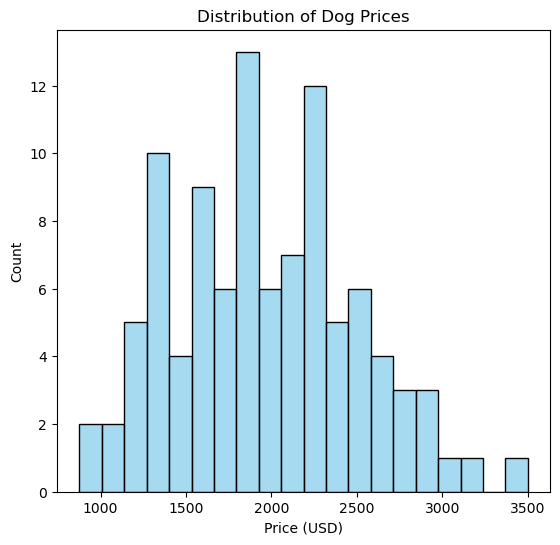

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(prices, bins=20, color='skyblue')
plt.title('Distribution of Dog Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

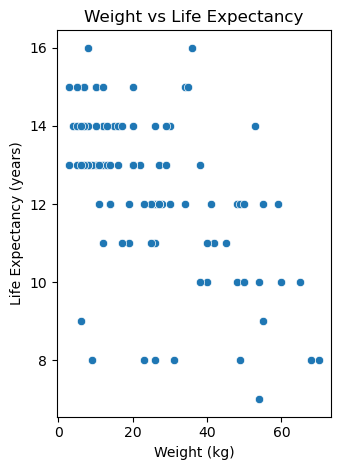

In [30]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=weights, y=life_exp)
plt.title('Weight vs Life Expectancy')
plt.xlabel('Weight (kg)')
plt.ylabel('Life Expectancy (years)')

plt.tight_layout()
plt.show()


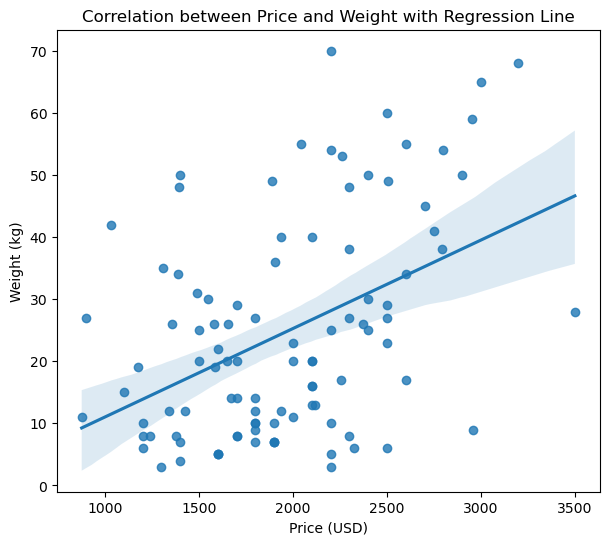

In [31]:
plt.figure(figsize=(7,6))
sns.regplot(x=prices, y=weights)
plt.title('Correlation between Price and Weight with Regression Line')
plt.xlabel('Price (USD)')
plt.ylabel('Weight (kg)')
plt.show()